In [1]:
import gym
import pickle

from human import TerminalHuman
from keyboard_agent import *
from utils import *
from LearnAtariReward import *


c:\Users\suba\.conda\envs\cpsc672\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = gym.make('LunarLander-v2')

In [3]:
demo_files = play(env, 5, 0, True)

ACTIONS=4
Press keys 1 2 3 ... to take actions 1 2 3 ...
No keys pressed is taking action 0


: 

In [7]:
h.input(5)

TypeError: object of type 'int' has no len()

In [21]:
# save the demosntrations
# output = play(env, 0, save=False)
# res = play_rand(env, 15, 0, save=True)

In [22]:
res = ['1668105089.1177604',
 '1668105094.1521122',
 '1668105096.6714065',
 '1668105100.2791483',
 '1668105105.8747754',
 '1668105108.6929462',
 '1668105112.4706893',
 '1668105115.2749567',
 '1668105119.1750195',
 '1668105123.139814',
 '1668105125.4567327',
 '1668105128.4647155',
 '1668105131.5153224',
 '1668105135.0170794',
 '1668105138.4981039']

In [23]:
demo_path = 'data-rand/demonstrations/gym-'
demonstrations = [pickle.load(open(demo_path+ f'{demo_name}' + '.pickle', 'rb'), encoding='latin1') for demo_name in res] # load from files
# demos[demo #] = control, state

In [24]:
# sorted best to worst demos
sorted_demonstrations = [(states, controls) for controls, states, reward in sorted(demonstrations, key=lambda pair: pair[2])]
sorted_rewards = [reward for controls, states, reward in sorted(demonstrations, key=lambda pair: pair[2])]

In [25]:
min([len(demonstrations[i][0]) for i in range(len(demonstrations))])

62

In [8]:
num_trajs =  0
num_snippets = 6000
min_snippet_length =  min(np.min([len(d[0]) for d in sorted_demonstrations]), 30) #min length of trajectory for training comparison
maximum_snippet_length = 100
max_snippet_length = min(np.min([len(d[0]) for d in sorted_demonstrations]), maximum_snippet_length)

In [9]:
# auto labelling, but this can be done with preference ranking
training_obs, training_labels = create_training_data(sorted_demonstrations, num_trajs, num_snippets, min_snippet_length, max_snippet_length)

maximum traj length 31


In [10]:
lr = 0.00005
weight_decay = 0.0
num_iter = 20 #num times through training data
l1_reg=0.0

In [15]:
reward_net = Net(8)

import torch.optim as optim
optimizer = optim.Adam(reward_net.parameters(),  lr=lr, weight_decay=weight_decay)

reward_model_path = 'reward_model/model0.pth'

learn_reward(reward_net, optimizer, training_obs, training_labels, num_iter, l1_reg, reward_model_path) #path is where to save the model
#save reward network
torch.save(reward_net.state_dict(), reward_model_path)

cpu
99
epoch 0 loss 1.641218662261963
tensor(6.9289, grad_fn=<AddBackward0>)
199
epoch 0 loss 0.018973175436258316
tensor(12.7387, grad_fn=<AddBackward0>)
299
epoch 0 loss 2.141167402267456
tensor(10.4205, grad_fn=<AddBackward0>)
399
epoch 0 loss 0.9082761406898499
tensor(7.1359, grad_fn=<AddBackward0>)
499
epoch 0 loss 0.0056969658471643925
tensor(13.0365, grad_fn=<AddBackward0>)
599
epoch 0 loss 0.0014586533652618527
tensor(9.0388, grad_fn=<AddBackward0>)
699
epoch 0 loss 0.013736008666455746
tensor(7.6025, grad_fn=<AddBackward0>)
799
epoch 0 loss 0.0023838456254452467
tensor(13.9887, grad_fn=<AddBackward0>)
899
epoch 0 loss 0.0010378933511674404
tensor(9.8608, grad_fn=<AddBackward0>)
999
epoch 0 loss 8.451581379631534e-05
tensor(14.0554, grad_fn=<AddBackward0>)
1099
epoch 0 loss 0.03195132315158844
tensor(7.3129, grad_fn=<AddBackward0>)
1199
epoch 0 loss 0.05943484976887703
tensor(4.7453, grad_fn=<AddBackward0>)
1299
epoch 0 loss 0.028153780847787857
tensor(6.1627, grad_fn=<AddBackw

1st see how it learns reward "Network"

In [16]:
with torch.no_grad():
        pred_returns = [predict_traj_return(reward_net, traj[0]) for traj in sorted_demonstrations]
for i, p in enumerate(pred_returns):
    print(i,p,sorted_rewards[i])

0 54.4447066783905 -362.18852614808526
1 47.720975428819656 -217.61016424414632
2 52.097526013851166 -189.99518832828852
3 42.32231566309929 -159.36152768835598
4 29.00987595319748 -146.1140926064082
5 35.61240200698376 -137.5032035750756
6 34.20258581638336 -135.85084168721104
7 24.991241216659546 -110.27148638803381
8 66.75667610764503 -106.96702195811058
9 51.61147516965866 -94.48181129665147
10 34.576077088713646 -90.10019050638121
11 27.2677384018898 -89.50723549407869
12 27.17969697713852 -89.31660912002741
13 38.593479454517365 -88.17919788862693
14 21.600657999515533 -57.02610638521248


In [17]:
import matplotlib.pyplot as plt

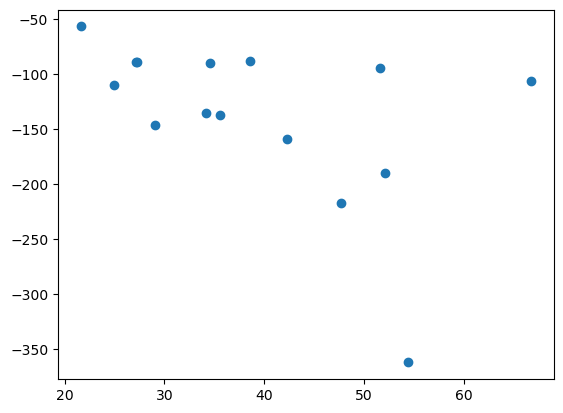

In [18]:
plt.scatter(pred_returns, sorted_rewards)

In [ ]:
# demo_names = ['1668059133.6913733', '1668059364.6035125', '1668059396.1789556', '1668059459.6041403', '1668091394.3350058', '1668091478.0278926']

In [ ]:
# demo_path = 'data/demonstrations/gym-'
# demos = [pickle.load(open(demo_path+ f'{demo_name}' + '.pickle', 'rb'), encoding='latin1') for demo_name in demo_names] # load from files
# demos[demo #] = control, state

In [ ]:
# H = TerminalHuman(env, 'approx')

In [ ]:
# out = H.input(demos)